In [5]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Global Development Data
base_dynamic = pd.ExcelFile("datasets/Dynamic_BG.xlsm")
high_dynamic = pd.ExcelFile("datasets/Dynamic_high.xlsm")
low_dynamic = pd.ExcelFile("datasets/Dynamic_low.xlsm")

base_mines = pd.read_excel(base_dynamic, "Mine")
base_fields = pd.read_excel(base_dynamic, "Field")
high_mines = pd.read_excel(high_dynamic, "Mine")
high_fields = pd.read_excel(high_dynamic, "Field")
low_mines = pd.read_excel(low_dynamic, "Mine")
low_fields = pd.read_excel(low_dynamic, "Field")

# Displaying the newly imported table
display(base_mines)

,Continent,Country,Region,Mineral,type,number,Start Year,Mine Prod. Low,Mine Prod High,Mine Life Low,...,Disruption reduction.1,Disruption Start.2,Disruption End.2,Disruption reduction.2,Disruption Start.3,Disruption End.3,Disruption reduction.3,Disruption Start.4,Disruption End.4,Disruption reduction.4
0,Africa,Morocco,all,Coal,Anthracite,1,1941,0.003000,0.018000,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,South_Africa,all,Coal,Anthracite,1,1900,0.001500,0.006000,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,South_Africa,all,Coal,Anthracite,2,1969,0.030000,0.030000,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,South_Africa,all,Coal,Anthracite,3,2002,0.030000,0.030000,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,Algeria,all,Coal,Bituminous,1,1936,0.001920,0.001920,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,FSU,FSU,Estonia,Oil,Kerogen,1,1940,0.005730,0.005730,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,FSU,FSU,ex_Estonia,Oil,Kerogen,1,2020,0.005730,0.057300,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,FSU,FSU,Russia,Oil,Kerogen,1,1951,0.005157,0.005157,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,South_America,Brazil,all,Oil,Kerogen,1,1988,0.007162,0.007162,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Base
base_URR_mines = base_mines.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(base_URR_mines)
base_URR_fields = base_fields.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(base_URR_fields)
base_URR_all = pd.concat([base_URR_mines, base_URR_fields]).groupby(['Continent', 'Mineral'], as_index=False).agg({'URR': 'sum'})

base_URR_all['Continent'] = base_URR_all['Continent'].replace({
    'FSU': 'Former Soviet Union',
    'North_America': 'North America',
    'South_America': 'Latin America',
    'Middle_East': 'Middle East'
})

base_URR_year = pd.concat([base_URR_mines, base_URR_fields]).groupby(['Start Year'], as_index=False).agg({'URR': 'sum'})
base_URR_year['Decade'] = (base_URR_year['Start Year'] // 10) * 10
base_URR_decade = base_URR_year.groupby('Decade', as_index=False).agg({'URR': 'sum'})
display(base_URR_all)
display(base_URR_year)

# Base #2
base_URR_mines_country = base_mines.groupby(['Country', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(base_URR_mines)
base_URR_fields_country = base_fields.groupby(['Country', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(base_URR_fields)
base_URR_all_country = pd.concat([base_URR_mines_country, base_URR_fields_country]).groupby(['Country', 'Mineral'], as_index=False).agg({'URR': 'sum'})
base_URR_all_country = base_URR_all_country.sort_values(by="URR", ascending=False)
base_URR_all_country = base_URR_all_country[base_URR_all_country["Mineral"]=="Gas"]
display(base_URR_all_country) 


# High
high_URR_mines = high_mines.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(high_URR_mines)
high_URR_fields = high_fields.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(high_URR_fields)
high_URR_all = pd.concat([high_URR_mines, high_URR_fields]).groupby(['Continent', 'Mineral'], as_index=False).agg({'URR': 'sum'})
high_URR_year = pd.concat([high_URR_mines, high_URR_fields]).groupby(['Start Year'], as_index=False).agg({'URR': 'sum'})
high_URR_year['Decade'] = (high_URR_year['Start Year'] // 10) * 10
high_URR_decade = high_URR_year.groupby('Decade', as_index=False).agg({'URR': 'sum'})

# Low
low_URR_mines = low_mines.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(low_URR_mines)
low_URR_fields = low_fields.groupby(['Continent', 'Mineral', "Start Year"], as_index=False).agg({'URR': 'sum'})
#display(low_URR_fields)
low_URR_all = pd.concat([low_URR_mines, low_URR_fields]).groupby(['Continent', 'Mineral'], as_index=False).agg({'URR': 'sum'})
low_URR_year = pd.concat([low_URR_mines, low_URR_fields]).groupby(['Start Year'], as_index=False).agg({'URR': 'sum'})
low_URR_year['Decade'] = (low_URR_year['Start Year'] // 10) * 10
low_URR_decade = low_URR_year.groupby('Decade', as_index=False).agg({'URR': 'sum'})

base_total_urr = base_mines['URR'].sum() + base_fields['URR'].sum()
high_total_urr = high_mines['URR'].sum() + high_fields['URR'].sum()
low_total_urr = low_mines['URR'].sum() + low_fields['URR'].sum()

print(base_total_urr)

,Continent,Mineral,URR
0,Africa,Coal,988.175662
1,Africa,Gas,3713.247000
2,Africa,Oil,2044.082000
3,Asia,Coal,12353.461979
4,Asia,Gas,4994.670476
5,Asia,Oil,2094.495300
6,Europe,Coal,2675.132990
7,Europe,Gas,1481.981300
8,Europe,Oil,665.916170
9,Former Soviet Union,Coal,1668.800000


,Start Year,URR,Decade
0,1710,554.900,1710
1,1750,105.700,1750
2,1776,105.400,1770
3,1785,16.000,1780
4,1795,153.010,1790
...,...,...,...
161,2028,894.235,2020
162,2030,5422.797,2030
163,2035,1072.460,2030
164,2040,3856.500,2040


,Country,Mineral,URR
100,FSU,Gas,4102.672000
304,USA,Gas,3504.530887
57,Canada,Gas,1854.004513
143,Iran,Gas,1712.100000
66,China,Gas,1285.007000
...,...,...,...
127,Guinea-Bissau,Gas,0.200000
315,Western_Sahara,Gas,0.100000
246,Senegal,Gas,0.100000
28,Belgium,Gas,0.016000


75675.81648000001


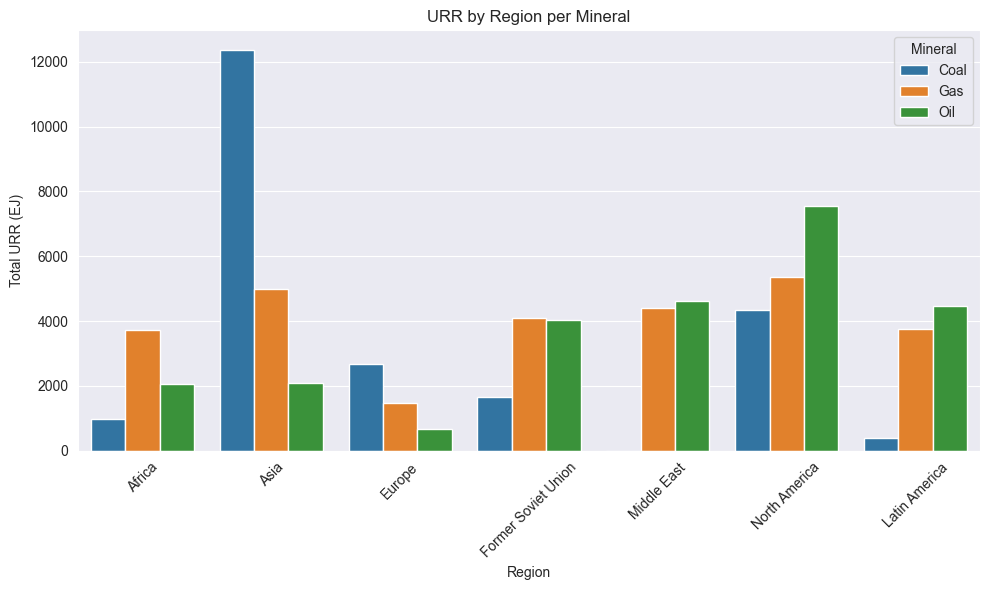

In [7]:

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=base_URR_all, x='Continent', y='URR', hue='Mineral')

# Customize the plot
plt.title('URR by Region per Mineral')
plt.xlabel('Region')
plt.ylabel('Total URR (EJ)')
plt.legend(title='Mineral')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('Outputs/URRRegionMineral.png')

# Show the plot
plt.show()


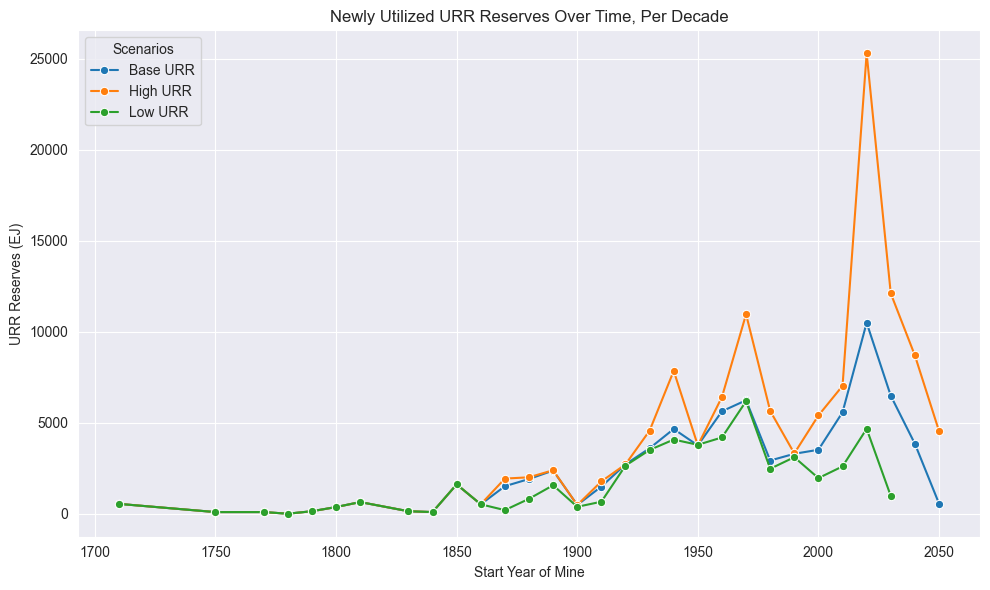

In [8]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=base_URR_decade, x='Decade', y='URR', marker='o', label='Base URR')
sns.lineplot(data=high_URR_decade, x='Decade', y='URR', marker='o', label='High URR')
sns.lineplot(data=low_URR_decade, x='Decade', y='URR', marker='o', label='Low URR')


# Customize the plot
plt.title('Newly Utilized URR Reserves Over Time, Per Decade')
plt.xlabel('Start Year of Mine')
plt.ylabel('URR Reserves (EJ)')
plt.legend(title='Scenarios')  # Add legend with a title
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.savefig('Outputs/URRReservesOverTimePerDecade.png')

# Show the plot
plt.show()

